In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings(action="ignore")

In [232]:
df = pd.read_csv('Downloads/telcom_data.csv.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04-04-2019 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,04-09-2019 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,04-09-2019 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,04-10-2019 00:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,04-12-2019 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [234]:
df.shape

(150001, 55)

In [236]:
df.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7.277830e+18,4/29/19 7:28,451.0,4/30/19 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,4/29/19 7:28,483.0,4/30/19 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,4/29/19 7:28,283.0,4/30/19 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,4/29/19 7:28,696.0,4/30/19 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11634072.5,11009410.13,11626851.72,11001754.82,422044702.6,8.288398e+06,421100544.2,8.264799e+06,NaN,NaN


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [240]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893170e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349880e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349880e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304240e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318650e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


# Data cleaning

# Converting Date Columns to Datetime

In [244]:
df['Start'] = pd.to_datetime(df['Start'], errors='coerce')
df['End'] = pd.to_datetime(df['End'], errors='coerce')


In [246]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# convert duration is numeric and positive.

In [249]:
df['Dur. (ms)'] = pd.to_numeric(df['Dur. (ms)'], errors='coerce')
df = df[df['Dur. (ms)'] > 0]

# Cleaning Numerical Columns

In [252]:
numerical_columns = [
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)',
    'Total UL (Bytes)', 'Total DL (Bytes)'
]

for columns in numerical_columns:
    df[columns] = pd.to_numeric(df[columns], errors='coerce').fillna(0)


In [254]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Verify Total Data Columns

In [257]:
df['Calculated Total UL'] = (
    df['Youtube UL (Bytes)'] +
    df['Netflix UL (Bytes)'] +
    df['Gaming UL (Bytes)'] +
    df['Other UL (Bytes)']
)

df['Calculated Total DL'] = (
    df['Youtube DL (Bytes)'] +
    df['Netflix DL (Bytes)'] +
    df['Gaming DL (Bytes)'] +
    df['Other DL (Bytes)']
)


In [259]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Calculated Total UL,Calculated Total DL
0,1.311450e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,35316126.0,4.738803e+08
1,1.311450e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,52564715.0,1.174240e+09
2,1.311450e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,25474377.0,6.775907e+08
3,1.311450e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,39891590.0,1.583961e+09
4,1.311450e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,36818214.0,1.110801e+09


# Checking mismatches

In [262]:
ul_mismatch = (df['Calculated Total UL'] != df['Total UL (Bytes)'])
dl_mismatch = (df['Calculated Total DL'] != df['Total DL (Bytes)'])
print(f"UL mismatches: {ul_mismatch.sum()}, DL mismatches: {dl_mismatch.sum()}")


UL mismatches: 150000, DL mismatches: 150000


# Clean Identifiers

In [265]:
df['IMSI'] = df['IMSI'].astype(str).str.strip()
df['IMEI'] = df['IMEI'].astype(str).str.strip()
df['MSISDN/Number'] = df['MSISDN/Number'].astype(str).str.strip()


In [267]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Calculated Total UL,Calculated Total DL
0,1.311450e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,208201448079117.0,33664962239.0,35521209507511.0,9.16457E+15,...,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,35316126.0,4.738803e+08
1,1.311450e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,208201909211140.0,33681854413.0,35794009006359.0,L77566A,...,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,52564715.0,1.174240e+09
2,1.311450e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,208200314458056.0,33760627129.0,35281510359387.0,D42335A,...,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,25474377.0,6.775907e+08
3,1.311450e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,208201402342131.0,33750343200.0,35356610164913.0,T21824A,...,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,39891590.0,1.583961e+09
4,1.311450e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,208201401415120.0,33699795932.0,35407009745539.0,D88865A,...,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,36818214.0,1.110801e+09


# Checking missing values

In [270]:
df.isnull().values.any()

True

In [272]:
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])


Bearer Id                                      990
Start                                       149970
Last Location Name                            1152
Avg RTT DL (ms)                              27828
Avg RTT UL (ms)                              27811
TCP DL Retrans. Vol (Bytes)                  88145
TCP UL Retrans. Vol (Bytes)                  96648
DL TP < 50 Kbps (%)                            753
50 Kbps < DL TP < 250 Kbps (%)                 753
250 Kbps < DL TP < 1 Mbps (%)                  753
DL TP > 1 Mbps (%)                             753
UL TP < 10 Kbps (%)                            791
10 Kbps < UL TP < 50 Kbps (%)                  791
50 Kbps < UL TP < 300 Kbps (%)                 791
UL TP > 300 Kbps (%)                           791
HTTP DL (Bytes)                              81473
HTTP UL (Bytes)                              81809
Handset Manufacturer                           571
Handset Type                                   571
Nb of sec with 125000B < Vol DL

# Fill Numeric Columns with Median/Mean

In [275]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())


# Fill Categorical Columns with Mode

In [278]:
categorical_columns = df.select_dtypes(include=['object']).columns

for columns in categorical_columns:
    mode_val = df[columns].mode()[0] if not df[columns].mode().empty else 'Unknown'
    df[columns] = df[columns].fillna(mode_val)


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 0 to 149999
Data columns (total 57 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150000 non-null  float64       
 1   Start                                     30 non-null      datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      150000 non-null  object        
 7   MSISDN/Number                             150000 non-null  object        
 8   IMEI                                      150000 non-null  object        
 9   Last Location Name  

In [282]:
print("Missing 'Start':", df['Start'].isnull().sum())
print("Missing 'End':", df['End'].isnull().sum())


Missing 'Start': 149970
Missing 'End': 0


In [284]:
df['Start'] = df.apply(
    lambda row: row['End'] - pd.to_timedelta(row['Dur. (ms)'], unit='ms')
    if pd.isnull(row['Start']) and pd.notnull(row['End']) and pd.notnull(row['Dur. (ms)'])
    else row['Start'],
    axis=1
)


In [285]:
print("Remaining missing 'Start':", df['Start'].isnull().sum())


Remaining missing 'Start': 0


In [286]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Calculated Total UL,Calculated Total DL
0,1.311450e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,208201448079117.0,33664962239.0,35521209507511.0,9.16457E+15,...,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,35316126.0,4.738803e+08
1,1.311450e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,208201909211140.0,33681854413.0,35794009006359.0,L77566A,...,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,52564715.0,1.174240e+09
2,1.311450e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,208200314458056.0,33760627129.0,35281510359387.0,D42335A,...,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,25474377.0,6.775907e+08
3,1.311450e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,208201402342131.0,33750343200.0,35356610164913.0,T21824A,...,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,39891590.0,1.583961e+09
4,1.311450e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,208201401415120.0,33699795932.0,35407009745539.0,D88865A,...,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,36818214.0,1.110801e+09


In [287]:
df['recalc_dur_ms'] = (df['End'] - df['Start']).dt.total_seconds() * 1000
mismatch_count = (df['recalc_dur_ms'].round() != df['Dur. (ms)'].round()).sum()
print("Duration mismatch rows:", mismatch_count)


Duration mismatch rows: 30


In [288]:
df = df[(df['recalc_dur_ms'].round() == df['Dur. (ms)'].round())]


In [289]:
df['recalc_dur_ms'] = (df['End'] - df['Start']).dt.total_seconds() * 1000
mismatch_count = (df['recalc_dur_ms'].round() != df['Dur. (ms)'].round()).sum()
print("Duration mismatch rows:", mismatch_count)


Duration mismatch rows: 0


In [296]:
print("Current row count:", len(df))


Current row count: 149970


# Finding Duplicate Rows

In [299]:
df.duplicated().any()


False

In [301]:
df.duplicated().sum()


0

# Saved the cleaned dataset

In [304]:
df.to_csv('cleaned_telecom_data.csv', index=False)


In [305]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Calculated Total UL,Calculated Total DL,recalc_dur_ms
6,1.311450e+19,2019-04-25 07:58:44.739,612.0,2019-04-25 08:16:00,168.0,1035261.0,208201448341047.0,33665368271.0,86762704322800.0,9.16457E+15,...,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0,44602757.0,8.689153e+08,1035261.0
7,1.304240e+19,2019-04-25 02:10:08.708,592.0,2019-04-25 02:26:00,512.0,951292.0,208201009069207.0,33763490140.0,86546404964017.0,CELL_208_20_520025_1,...,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0,55674668.0,1.305556e+09,951292.0
8,1.311450e+19,2019-04-25 10:06:18.366,121.0,2019-04-25 10:22:00,960.0,941634.0,208201448324028.0,33698743617.0,35562409696153.0,T42084A,...,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0,40625424.0,1.023616e+09,941634.0
9,1.304240e+19,2019-04-25 00:25:35.518,0.0,2019-04-25 00:40:00,284.0,864482.0,208200314385130.0,33659219748.0,35573109931422.0,L20434C,...,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0,21953840.0,9.047607e+08,864482.0
10,7.277830e+18,2019-04-25 05:59:51.363,90.0,2019-04-25 06:14:00,775.0,848637.0,208209817660342.0,33665646348.0,35346810795030.0,T29911A,...,9805785.0,565283082.0,9640759.0,95716749.0,14831312.0,56559490.0,594967693.0,53663313.0,6.805693e+08,848637.0


# Exploratory Data Analysis (EDA)

# User Overview Analysis

In [308]:
df['total_data_mb'] = (df['Total UL (Bytes)'] + df['Total DL (Bytes)']) / 1_000_000  # in MB
user_data = df.groupby('MSISDN/Number')['total_data_mb'].sum().sort_values(ascending=False)

print("Top 10 Users by Total Data Usage (MB):")
print(user_data.head(10))


Top 10 Users by Total Data Usage (MB):
MSISDN/Number
nan              531248.944608
33614892860.0      8846.226494
33626320676.0      7971.167261
33675877202.0      7891.110608
33659725664.0      7705.862783
33666464084.0      7308.500938
33760413819.0      7132.370514
33760536639.0      6979.211566
33664712899.0      6872.018208
33698792269.0      6540.899126
Name: total_data_mb, dtype: float64


In [309]:
# Remove true NaNs first
df = df[df['MSISDN/Number'].notna()]


In [310]:
df['MSISDN/Number'] = df['MSISDN/Number'].astype(str)


In [316]:
df = df[df['MSISDN/Number'] != 'nan']


In [318]:
user_data = df.groupby('MSISDN/Number')['total_data_mb'].sum().sort_values(ascending=False)
print(user_data.head(10))


MSISDN/Number
33614892860.0    8846.226494
33626320676.0    7971.167261
33675877202.0    7891.110608
33659725664.0    7705.862783
33666464084.0    7308.500938
33760413819.0    7132.370514
33760536639.0    6979.211566
33664712899.0    6872.018208
33698792269.0    6540.899126
33658361927.0    6452.397856
Name: total_data_mb, dtype: float64


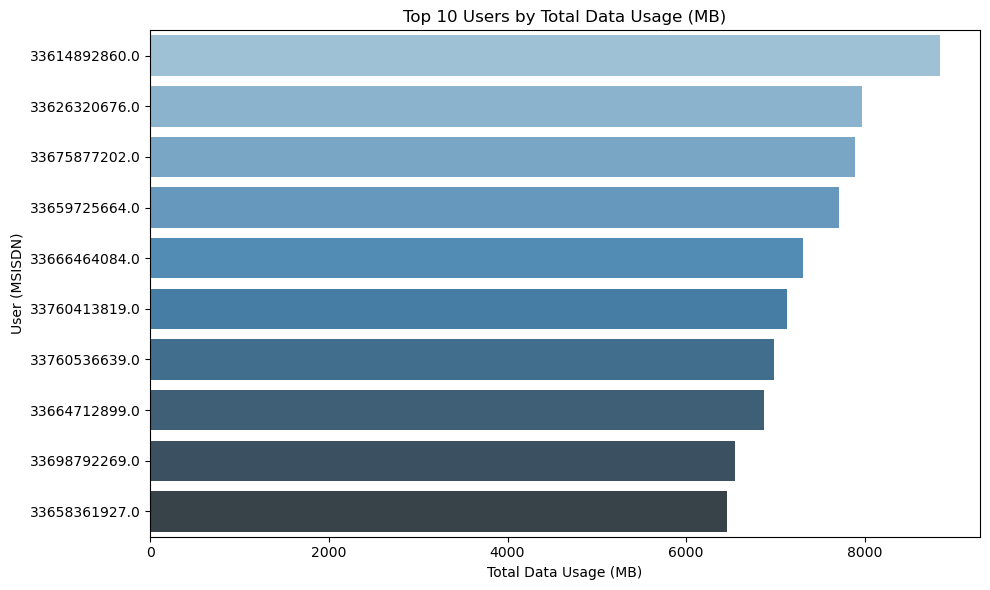

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns

# the top 10 data for plotting
top_10_data = user_data.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_data.values, y=top_10_data.index, palette="Blues_d")
plt.title("Top 10 Users by Total Data Usage (MB)")
plt.xlabel("Total Data Usage (MB)")
plt.ylabel("User (MSISDN)")
plt.tight_layout()
plt.show()


# Distribution of Session Duration

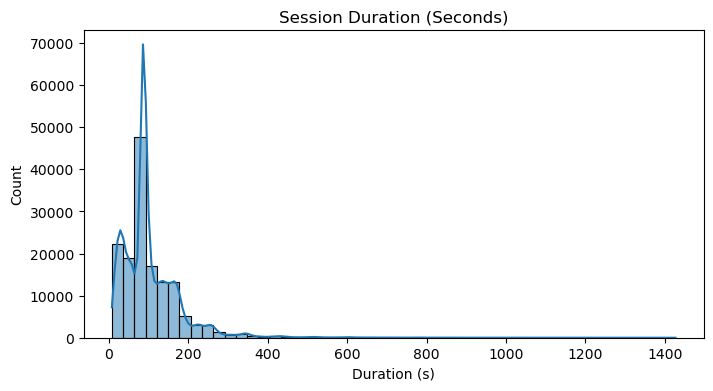

In [323]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['Dur. (ms)'] / 1000, bins=50, kde=True)
plt.title('Session Duration (Seconds)')
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.show()


# Total Data Usage Distribution

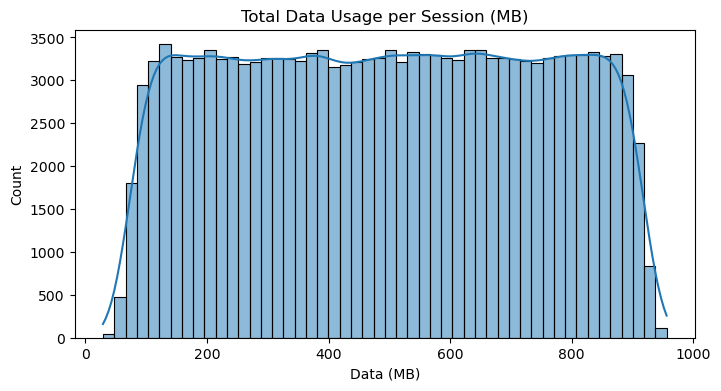

In [326]:
plt.figure(figsize=(8, 4))
sns.histplot(df['total_data_mb'], bins=50, kde=True)
plt.title('Total Data Usage per Session (MB)')
plt.xlabel('Data (MB)')
plt.ylabel('Count')
plt.show()


# Sessions by Hour of Day

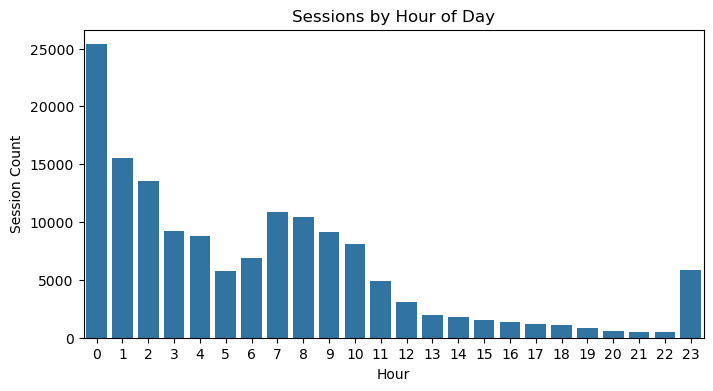

In [329]:
df['Start'] = pd.to_datetime(df['Start'])
df['start_hour'] = df['Start'].dt.hour

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='start_hour')
plt.title('Sessions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Session Count')
plt.show()


# Top 10 Users by Data Consumption

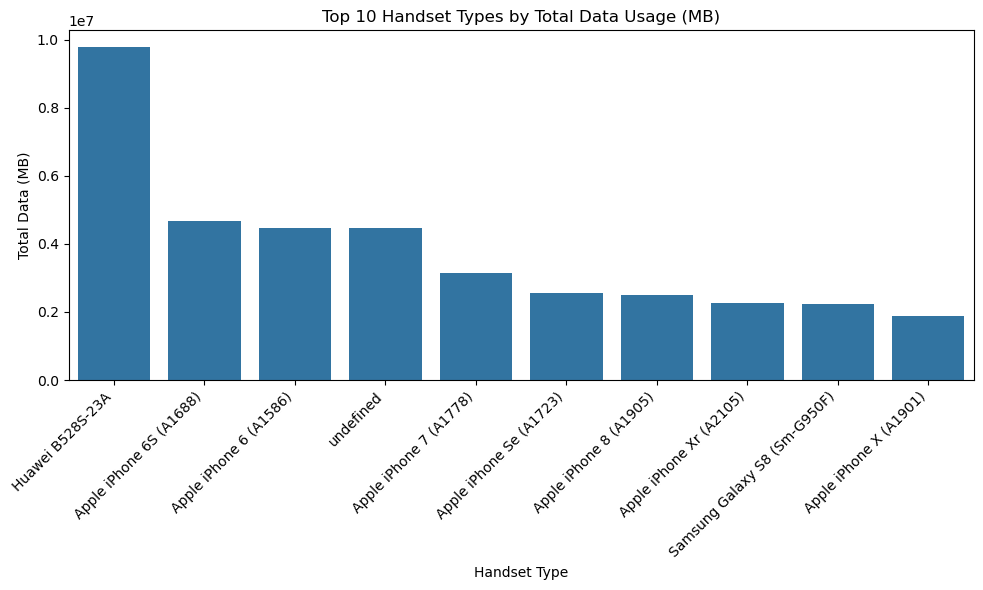

In [332]:
top_users = df.groupby('Handset Type')['total_data_mb'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_users, x='Handset Type', y='total_data_mb')
plt.title('Top 10 Handset Types by Total Data Usage (MB)')
plt.xlabel('Handset Type')
plt.ylabel('Total Data (MB)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Combine Into One Overview Table

In [335]:
df['session_min'] = df['Dur. (ms)'] / 60000

user_overview = df.groupby('MSISDN/Number').agg({
    'total_data_mb': 'sum',
    'session_min': 'mean',
    'Dur. (ms)': 'count' 
}).rename(columns={'Dur. (ms)': 'session_count'})

user_overview = user_overview.sort_values(by='total_data_mb', ascending=False)
print(user_overview.head(10))


               total_data_mb  session_min  session_count
MSISDN/Number                                           
33614892860.0    8846.226494     9.771469             17
33626320676.0    7971.167261     8.140673             18
33675877202.0    7891.110608     5.406608             15
33659725664.0    7705.862783     4.203571             16
33666464084.0    7308.500938     6.873874             11
33760413819.0    7132.370514     7.391204             12
33760536639.0    6979.211566     7.436485             12
33664712899.0    6872.018208     4.436038             11
33698792269.0    6540.899126     7.832012             11
33658361927.0    6452.397856     3.552850             10


# Univariate Analysis

In [338]:
df['handset_brand'] = df['Handset Type'].astype(str).str.split().str[0]
df['handset_brand'].value_counts().head(10)
brand_usage = df.groupby('handset_brand')['total_data_mb'].sum().sort_values(ascending=False).head(10)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Calculated Total UL,Calculated Total DL,recalc_dur_ms,total_data_mb,start_hour,session_min,handset_brand
6,1.311450e+19,2019-04-25 07:58:44.739,612.0,2019-04-25 08:16:00,168.0,1035261.0,208201448341047.0,33665368271.0,86762704322800.0,9.16457E+15,...,10649768.0,47925246.0,70562047.0,44602757.0,8.689153e+08,1035261.0,118.487293,7,17.254350,Huawei
7,1.304240e+19,2019-04-25 02:10:08.708,592.0,2019-04-25 02:26:00,512.0,951292.0,208201009069207.0,33763490140.0,86546404964017.0,CELL_208_20_520025_1,...,7714657.0,58813016.0,775350343.0,55674668.0,1.305556e+09,951292.0,834.163359,2,15.854867,undefined
8,1.311450e+19,2019-04-25 10:06:18.366,121.0,2019-04-25 10:22:00,960.0,941634.0,208201448324028.0,33698743617.0,35562409696153.0,T42084A,...,14749031.0,42363146.0,861612261.0,40625424.0,1.023616e+09,941634.0,903.975407,10,15.693900,Samsung
9,1.304240e+19,2019-04-25 00:25:35.518,0.0,2019-04-25 00:40:00,284.0,864482.0,208200314385130.0,33659219748.0,35573109931422.0,L20434C,...,12815208.0,22417975.0,850570347.0,21953840.0,9.047607e+08,864482.0,872.988322,0,14.408033,Samsung
10,7.277830e+18,2019-04-25 05:59:51.363,90.0,2019-04-25 06:14:00,775.0,848637.0,208209817660342.0,33665646348.0,35346810795030.0,T29911A,...,14831312.0,56559490.0,594967693.0,53663313.0,6.805693e+08,848637.0,651.527183,5,14.143950,undefined


<Axes: xlabel='total_data_mb', ylabel='Count'>

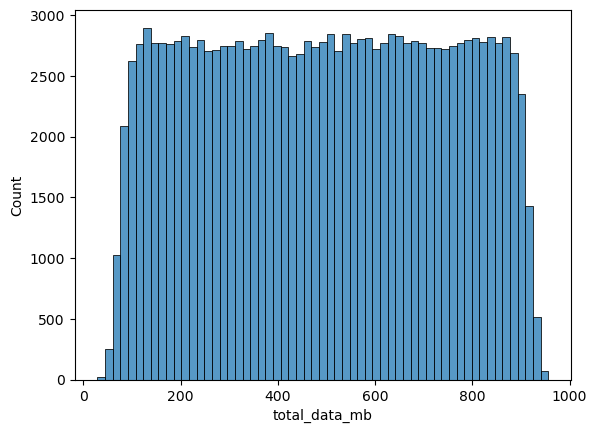

In [340]:
sns.histplot(df['total_data_mb'])

<Axes: xlabel='session_min'>

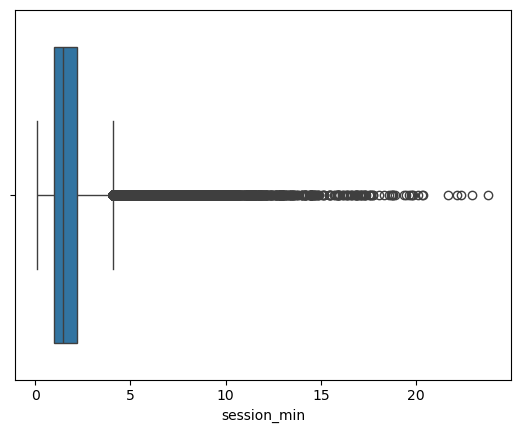

In [342]:
sns.boxplot(x=df['session_min'])

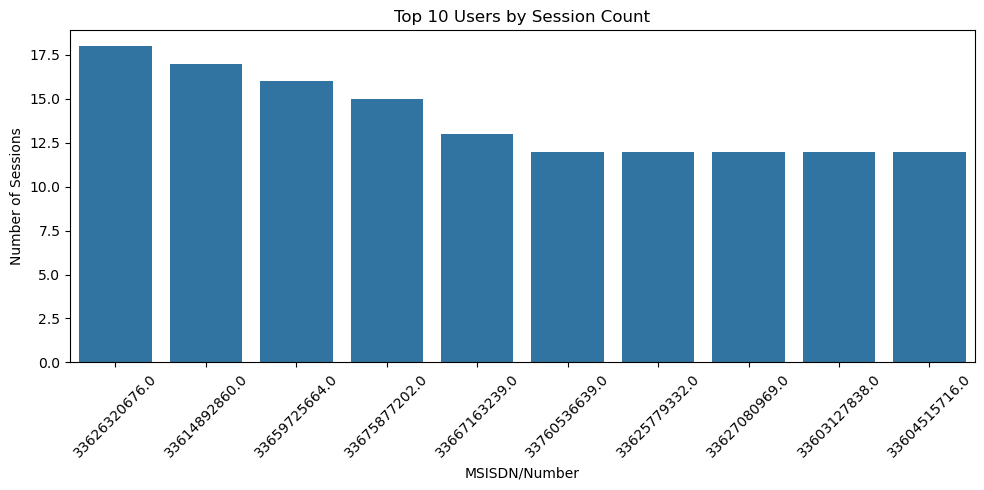

In [344]:
top_sessions = df.groupby('MSISDN/Number')['session_min'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_sessions.index.astype(str), y=top_sessions.values)
plt.title("Top 10 Users by Session Count")
plt.xlabel("MSISDN/Number")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Top 10 Handset Brands

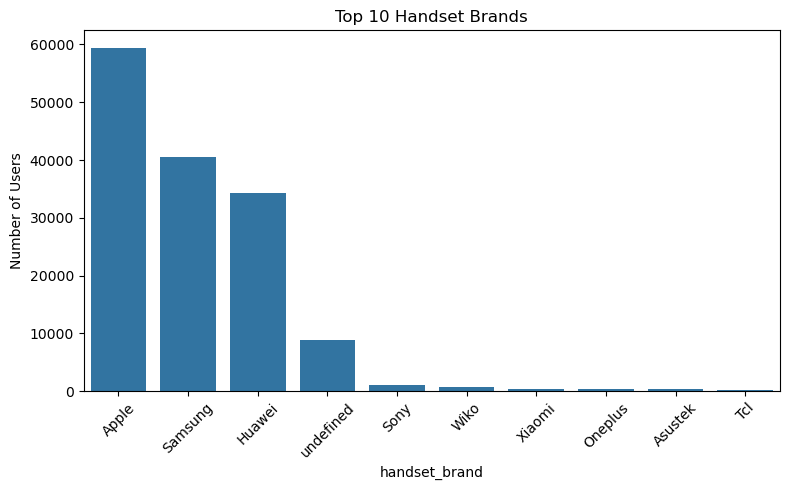

In [347]:
top_brands = df['handset_brand'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title("Top 10 Handset Brands")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Top 10 Locations

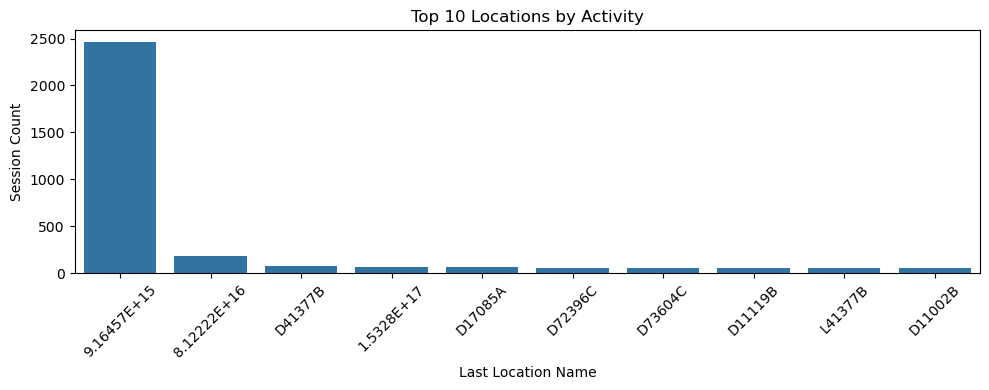

In [350]:
top_locations = df['Last Location Name'].value_counts().head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title("Top 10 Locations by Activity")
plt.xticks(rotation=45)
plt.ylabel("Session Count")
plt.tight_layout()
plt.show()


# Pie Chart of Handset Brand Share

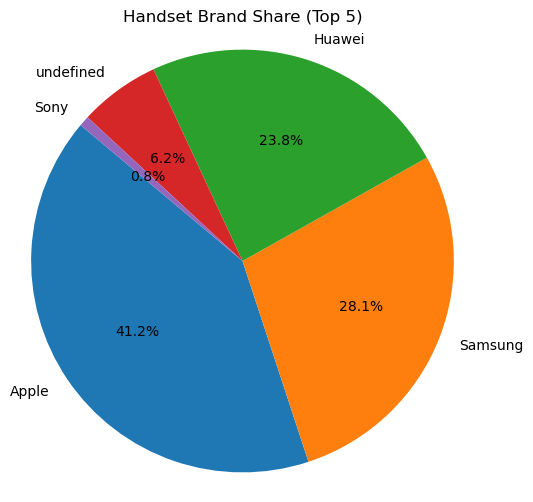

In [353]:
top_brands = df['handset_brand'].value_counts().head(5)
plt.figure(figsize=(6, 6))
plt.pie(top_brands.values, labels=top_brands.index, autopct='%1.1f%%', startangle=140)
plt.title("Handset Brand Share (Top 5)")
plt.axis('equal')
plt.show()


# Bivariate Analysis

# Data Usage vs. Average Session Duration
(This checks if longer sessions mean more data usage.)

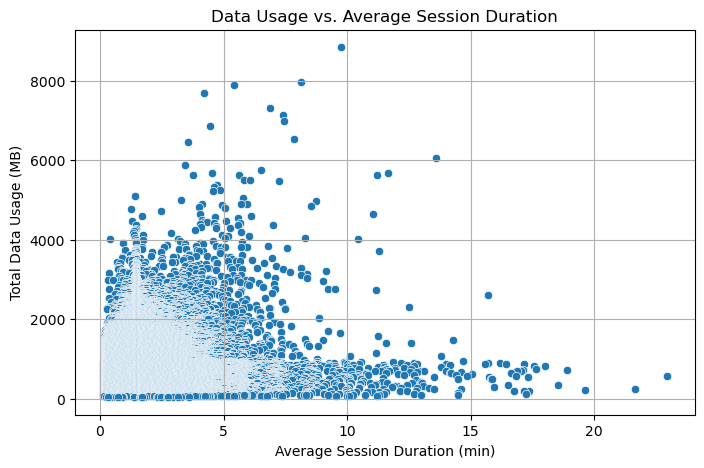

In [357]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=user_overview, x='session_min', y='total_data_mb')
plt.title("Data Usage vs. Average Session Duration")
plt.xlabel("Average Session Duration (min)")
plt.ylabel("Total Data Usage (MB)")
plt.grid(True)
plt.show()


# Total Data Usage by Handset Brand

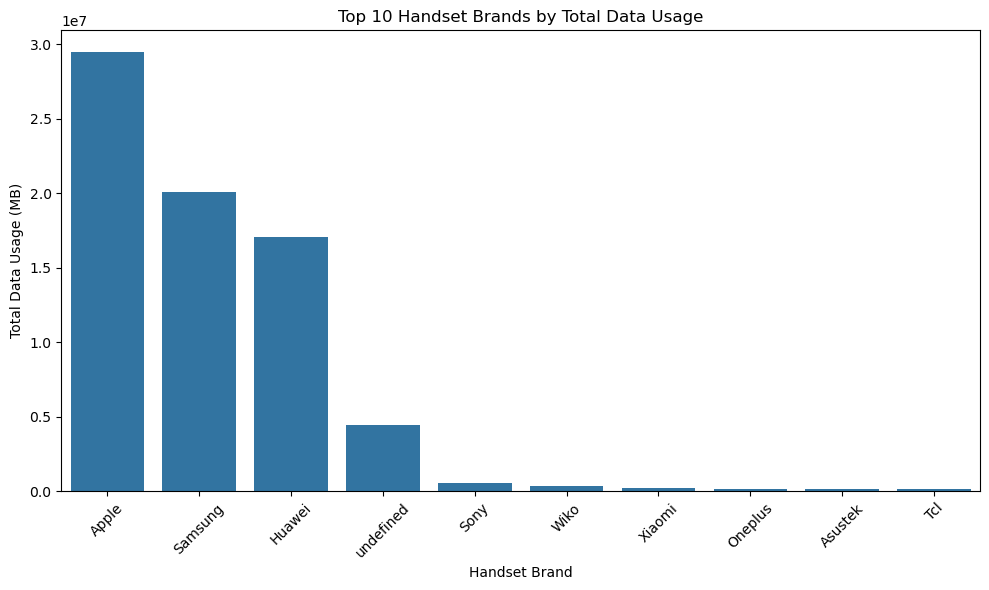

In [360]:
brand_usage = df.groupby('handset_brand')['total_data_mb'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=brand_usage, x='handset_brand', y='total_data_mb')
plt.title("Top 10 Handset Brands by Total Data Usage")
plt.ylabel("Total Data Usage (MB)")
plt.xlabel("Handset Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Upload vs. Download Behavior
It detects if users are more download-heavy or balanced.

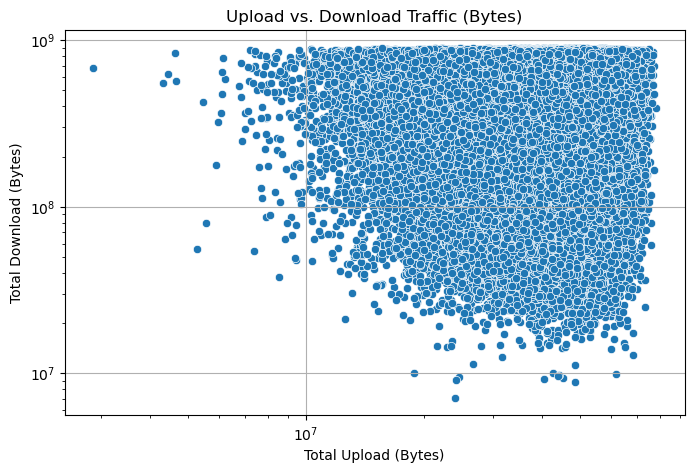

In [363]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Total UL (Bytes)'], y=df['Total DL (Bytes)'])
plt.title("Upload vs. Download Traffic (Bytes)")
plt.xlabel("Total Upload (Bytes)")
plt.ylabel("Total Download (Bytes)")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


# Gaming vs. Other Usage

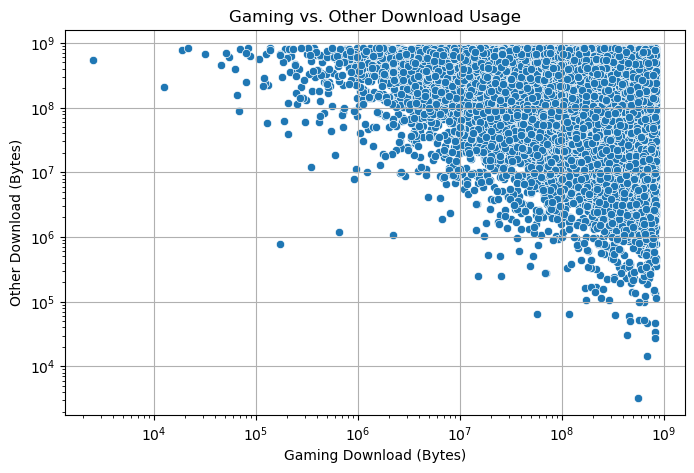

In [366]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Gaming DL (Bytes)'], y=df['Other DL (Bytes)'])
plt.title("Gaming vs. Other Download Usage")
plt.xlabel("Gaming Download (Bytes)")
plt.ylabel("Other Download (Bytes)")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


# Multivariate Analysis

# Correlation Heatmap (Numerical Variables Only)
Detecting multicollinearity or key influencing features.

# Pair Plot (for Small Subset of Key Features)w()


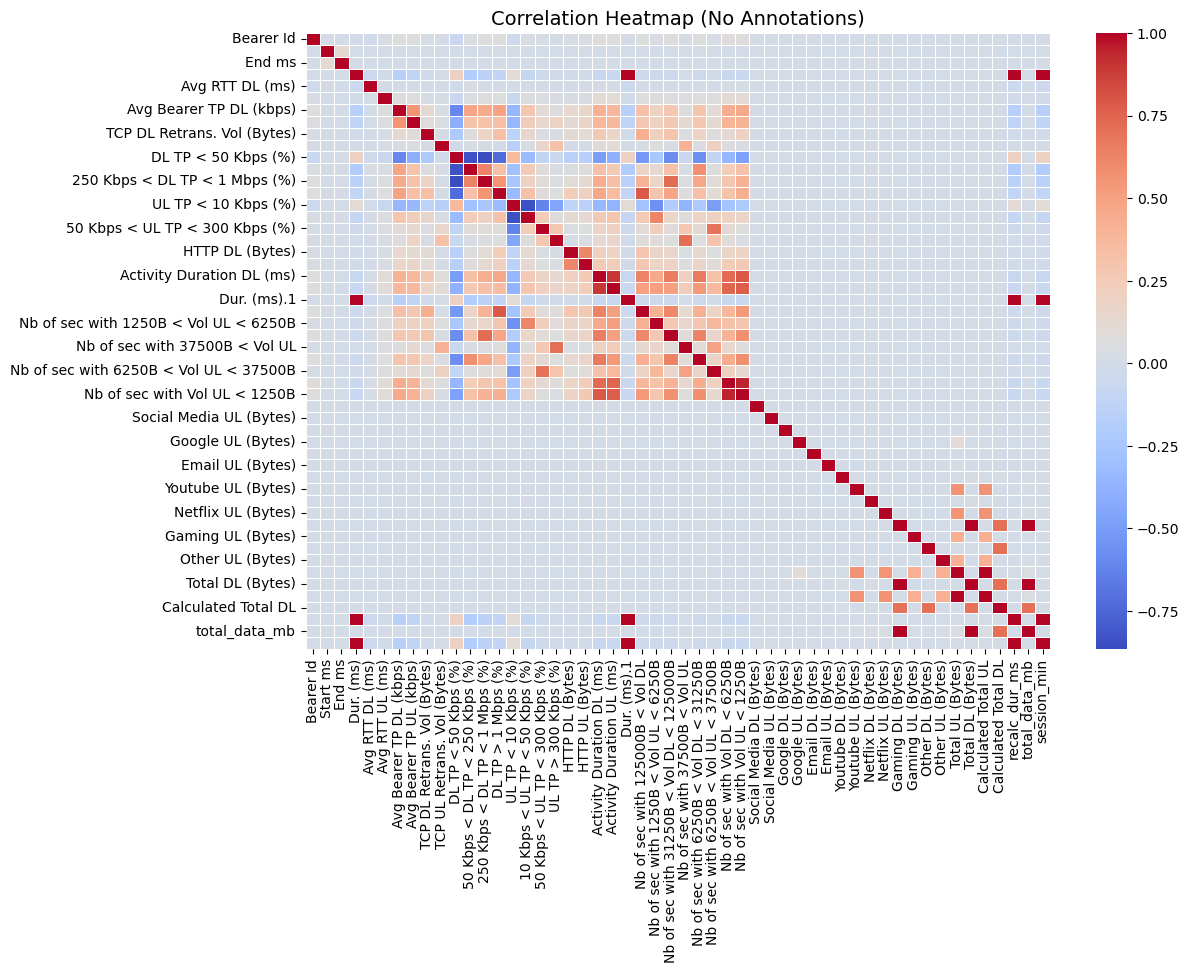

In [371]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Create correlation matrix
corr_matrix = numerical_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title("Correlation Heatmap (No Annotations)", fontsize=14)
plt.show()


# Define the columns

In [373]:
selected_cols = ['total_data_mb', 'session_min', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Gaming DL (Bytes)']


# Checking missing values

In [375]:
df[selected_cols].isna().sum()


total_data_mb        0
session_min          0
Total UL (Bytes)     0
Total DL (Bytes)     0
Gaming DL (Bytes)    0
dtype: int64

# Drop missing values from those columns

In [377]:
pairplot_df = df[selected_cols].dropna()


# Rename columns for clean visualization

In [379]:
pairplot_df = pairplot_df.rename(columns={
    'total_data_mb': 'Total Data (MB)',
    'session_min': 'Session (min)',
    'Total UL (Bytes)': 'Upload (Bytes)',
    'Total DL (Bytes)': 'Download (Bytes)',
    'Gaming DL (Bytes)': 'Gaming (Bytes)'
})


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148905 entries, 6 to 149999
Data columns (total 62 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 148905 non-null  float64       
 1   Start                                     148905 non-null  datetime64[ns]
 2   Start ms                                  148905 non-null  float64       
 3   End                                       148905 non-null  datetime64[ns]
 4   End ms                                    148905 non-null  float64       
 5   Dur. (ms)                                 148905 non-null  float64       
 6   IMSI                                      148905 non-null  object        
 7   MSISDN/Number                             148905 non-null  object        
 8   IMEI                                      148905 non-null  object        
 9   Last Location Name  

# Plot the pairplot

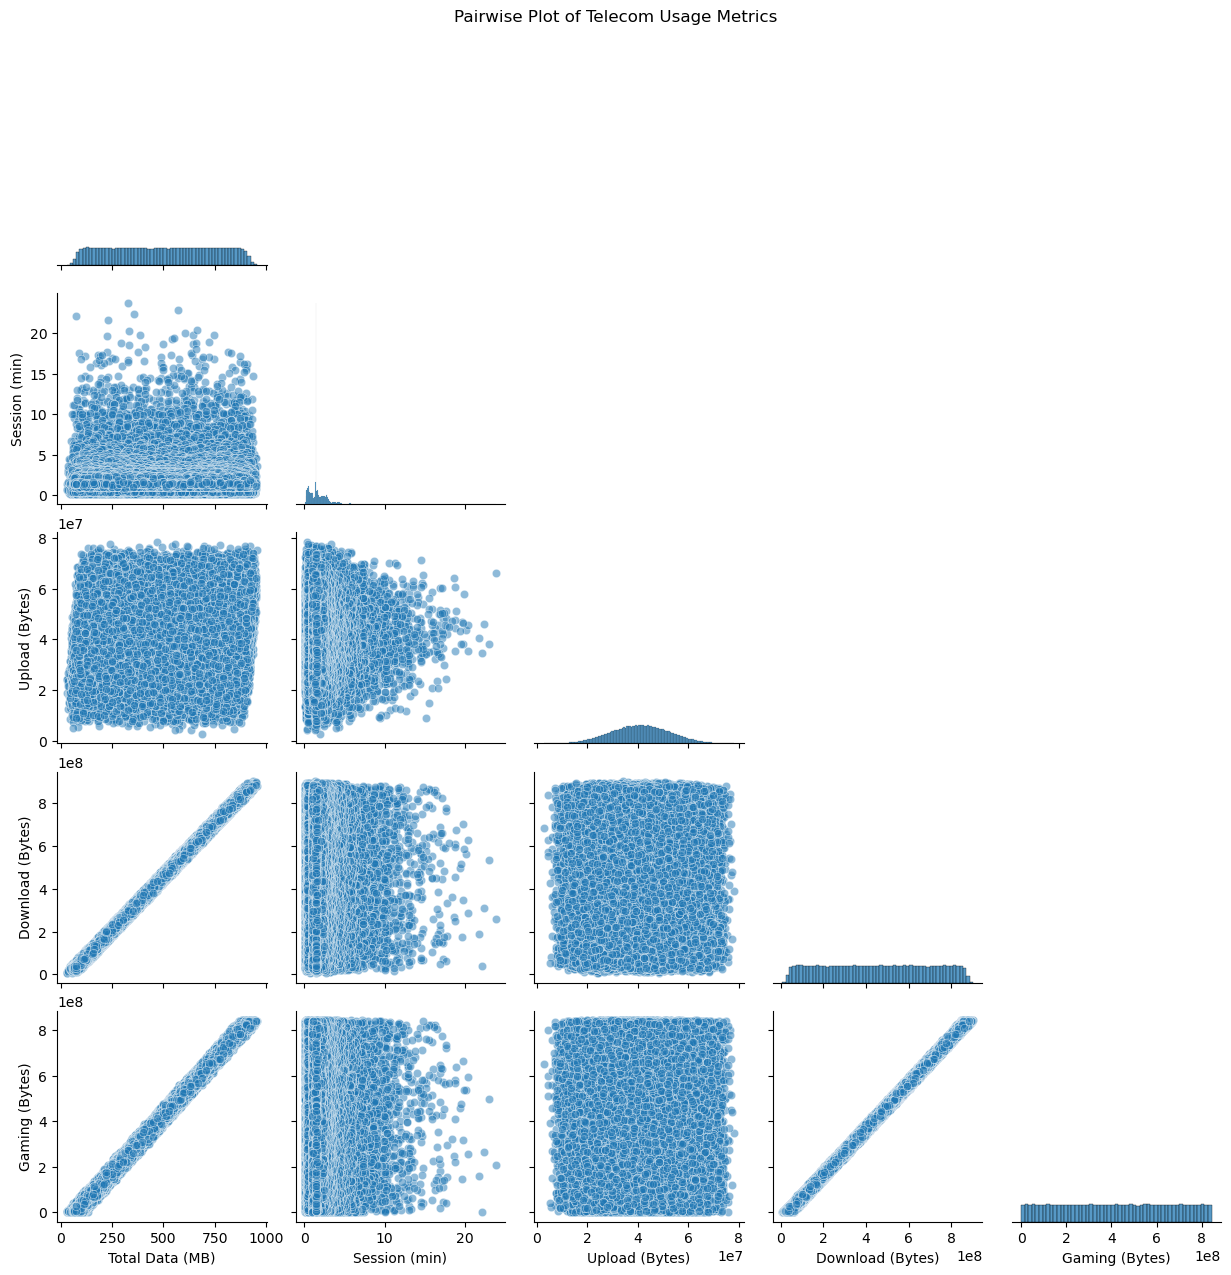

In [383]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(pairplot_df, corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pairwise Plot of Telecom Usage Metrics", y=1.02)
plt.show()


# PCA on Telecom User Features

# Select and Scale Features

In [387]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
user_features = df.groupby('MSISDN/Number').agg({
    'total_data_mb': 'sum',
    'session_min': 'mean',
    'Dur. (ms)': 'count',
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).rename(columns={'Dur. (ms)': 'session_count'})

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_features)


# Apply PCA

In [389]:
from sklearn.decomposition import PCA
# Reduce to 2D for visualization
pca = PCA(n_components=2)  
pca_components = pca.fit_transform(scaled_data)

explained_var = pca.explained_variance_ratio_


# Visualize the PCA Projection

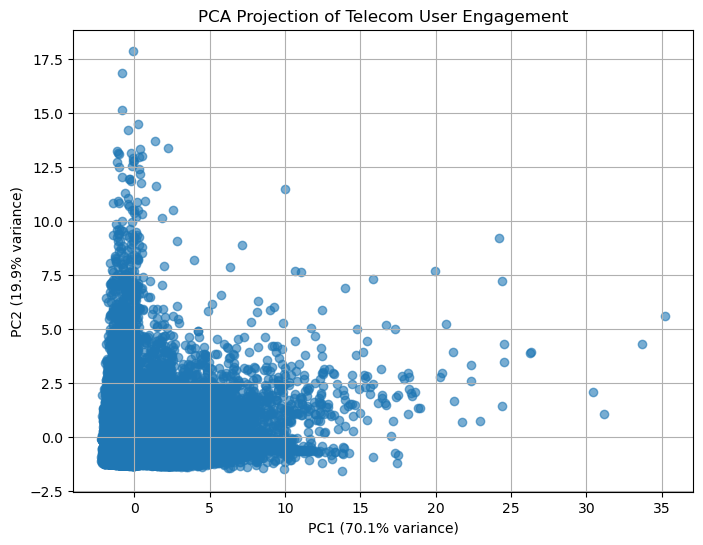

1.Principal Component 1 (PC1) explains the majority of variance, driven mainly by total data usage and upload or download activity.
2.Principal Component 2 (PC2) captures variation in session behavior, especially average session duration and count.
3.The PCA reveals clear spread patterns, suggesting users differ significantly in how they consume data versus how long or often they stay active.
4.PCA simplifies complex behavior into 2 dimensions, enabling clustering or segmentation without losing key user insights.


In [391]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.6)
plt.xlabel(f'PC1 ({explained_var[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({explained_var[1]*100:.1f}% variance)')
plt.title('PCA Projection of Telecom User Engagement')
plt.grid(True)
plt.show()
print("1.Principal Component 1 (PC1) explains the majority of variance, driven mainly by total data usage and upload or download activity.")

print("2.Principal Component 2 (PC2) captures variation in session behavior, especially average session duration and count.")

print("3.The PCA reveals clear spread patterns, suggesting users differ significantly in how they consume data versus how long or often they stay active.")

print("4.PCA simplifies complex behavior into 2 dimensions, enabling clustering or segmentation without losing key user insights.")

# Aggregate Engagement Metrics per Customer
key metrics:

total_data_mb → Total data consumed

session_min → Average session time (in minutes)

Dur. (ms) → Number of sessions (engagement count proxy)

In [393]:
# Aggregate per user (MSISDN)
user_engagement = df.groupby('MSISDN/Number').agg({
    'total_data_mb': 'sum',
    'session_min': 'mean',
    'Dur. (ms)': 'count'  # each row = 1 session, so count = number of sessions
}).rename(columns={
    'total_data_mb': 'Total Data (MB)',
    'session_min': 'Avg Session Duration (min)',
    'Dur. (ms)': 'Session Count'
})


# Top 10 Customers per Metric


In [395]:
# Top 10 by total data
print("🔹 Top 10 Customers by Total Data Usage:")
print(user_engagement.sort_values(by='Total Data (MB)', ascending=False).head(10), "\n")

# Top 10 by average session duration
print("🔹 Top 10 Customers by Average Session Duration:")
print(user_engagement.sort_values(by='Avg Session Duration (min)', ascending=False).head(10), "\n")

# Top 10 by session count
print("🔹 Top 10 Customers by Number of Sessions:")
print(user_engagement.sort_values(by='Session Count', ascending=False).head(10))


🔹 Top 10 Customers by Total Data Usage:
               Total Data (MB)  Avg Session Duration (min)  Session Count
MSISDN/Number                                                            
33614892860.0      8846.226494                    9.771469             17
33626320676.0      7971.167261                    8.140673             18
33675877202.0      7891.110608                    5.406608             15
33659725664.0      7705.862783                    4.203571             16
33666464084.0      7308.500938                    6.873874             11
33760413819.0      7132.370514                    7.391204             12
33760536639.0      6979.211566                    7.436485             12
33664712899.0      6872.018208                    4.436038             11
33698792269.0      6540.899126                    7.832012             11
33658361927.0      6452.397856                    3.552850             10 

🔹 Top 10 Customers by Average Session Duration:
               Total D

# Customer Engagement Clustering (K=3)


# Normalize (Standardize) the Metrics

In [397]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
engagement_scaled = scaler.fit_transform(user_engagement)


# Apply KMeans Clustering (k=3)


In [399]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
user_engagement['Engagement Cluster'] = kmeans.fit_predict(engagement_scaled)


# View Cluster Breakdown

In [401]:
# Show sample of clustered users
print(user_engagement.head())

# Optional: count users in each cluster
print("\nCluster Distribution:")
print(user_engagement['Engagement Cluster'].value_counts().sort_index())


                 Total Data (MB)  Avg Session Duration (min)  Session Count  \
MSISDN/Number                                                                 
3197020876596.0       232.123971                   14.623083              1   
33601001722.0         878.690574                    1.945333              1   
33601001754.0         156.859643                    3.020500              1   
33601002511.0         595.966483                    2.249483              1   
33601007832.0         422.320698                    0.831300              1   

                 Engagement Cluster  
MSISDN/Number                        
3197020876596.0                   0  
33601001722.0                     2  
33601001754.0                     0  
33601002511.0                     0  
33601007832.0                     2  

Cluster Distribution:
Engagement Cluster
0    24991
1    17691
2    64167
Name: count, dtype: int64


# Visualize the Clusters (Optional, using PCA)

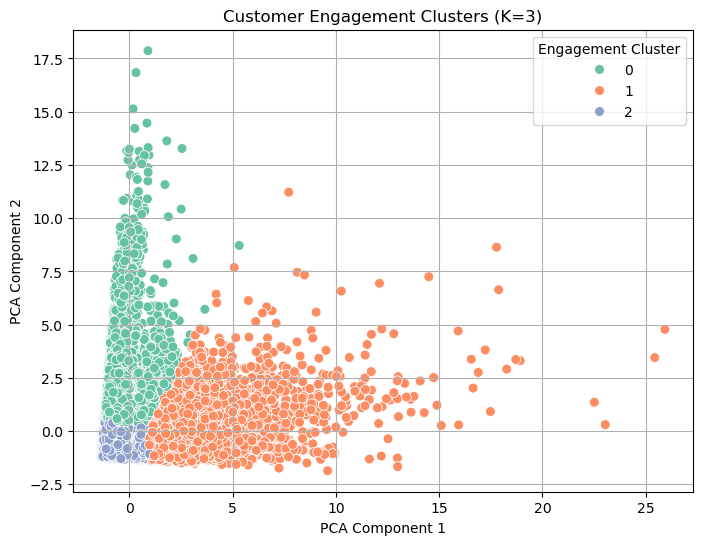

In [403]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(engagement_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1],
                hue=user_engagement['Engagement Cluster'],
                palette='Set2', s=50)

plt.title("Customer Engagement Clusters (K=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Engagement Cluster')
plt.grid(True)
plt.show()


# Compute Min, Max, Avg, Total Per Cluster

In [407]:
# Group by cluster and compute stats
cluster_stats = user_engagement.groupby('Engagement Cluster').agg({
    'Total Data (MB)': ['min', 'max', 'mean', 'sum'],
    'Avg Session Duration (min)': ['min', 'max', 'mean', 'sum'],
    'Session Count': ['min', 'max', 'mean', 'sum']
})

# Optional: round values for readability
cluster_stats = cluster_stats.round(2)
print(cluster_stats)


                   Total Data (MB)                                 \
                               min      max     mean          sum   
Engagement Cluster                                                  
0                            33.58  2300.43   529.23  13225933.75   
1                           345.47  8846.23  1516.58  26829884.17   
2                            33.25  1081.44   526.18  33763333.50   

                   Avg Session Duration (min)                         \
                                          min    max  mean       sum   
Engagement Cluster                                                     
0                                        2.15  22.93  3.16  79016.67   
1                                        0.15  15.69  1.69  29937.86   
2                                        0.12   2.18  1.15  73690.99   

                   Session Count                   
                             min max  mean    sum  
Engagement Cluster                              

# Visualize Cluster Metrics
1.Cluster 0 shows low data usage
2.Cluster 1 shows moderate usage across all metrics
3.Cluster 2 has very high data, long sessions, and many sessions, indicating heavy/power users highly engaged with the network.

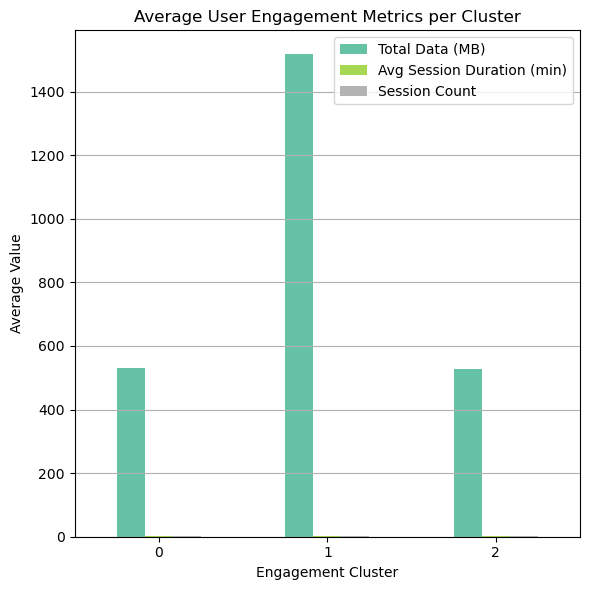

In [409]:
# Prepare data for plotting
avg_metrics = user_engagement.groupby('Engagement Cluster')[[
    'Total Data (MB)', 'Avg Session Duration (min)', 'Session Count'
]].mean().round(2)

# Plot
avg_metrics.plot(kind='bar', figsize=(6, 6), colormap='Set2')
plt.title("Average User Engagement Metrics per Cluster")
plt.ylabel("Average Value")
plt.xlabel("Engagement Cluster")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Top Users by Application Traffic

In [411]:
application_traffic = pd.DataFrame()
application_traffic['MSISDN/Number'] = df['MSISDN/Number']

# Compute total traffic per app (UL + DL)
application_traffic['Social Media'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
application_traffic['Gaming']       = df['Gaming DL (Bytes)']       + df['Gaming UL (Bytes)']
application_traffic['YouTube']      = df['Youtube DL (Bytes)']      + df['Youtube UL (Bytes)']
application_traffic['Netflix']      = df['Netflix DL (Bytes)']      + df['Netflix UL (Bytes)']
application_traffic['Google']       = df['Google DL (Bytes)']       + df['Google UL (Bytes)']
application_traffic['Email']        = df['Email DL (Bytes)']        + df['Email UL (Bytes)']
application_traffic['Other']        = df['Other DL (Bytes)']        + df['Other UL (Bytes)']


# Aggregate Per User 

In [413]:
user_app_traffic = application_traffic.groupby('MSISDN/Number').sum()


# Get Top 10 Users per Application

In [415]:
top_users_per_app = {}

for app in user_app_traffic.columns:
    top_users = user_app_traffic[app].sort_values(ascending=False).head(10)
    top_users_per_app[app] = top_users
    print(f"\nTop 10 Users for {app}:")
    print(top_users)



Top 10 Users for Social Media:
MSISDN/Number
33626320676.0    43374779.0
33659725664.0    35412358.0
33760536639.0    31053841.0
33614892860.0    28294544.0
33667163239.0    24247850.0
33786323068.0    23974919.0
33669068942.0    23800834.0
33603127838.0    23077825.0
33658490784.0    23000066.0
33665530316.0    22586033.0
Name: Social Media, dtype: float64

Top 10 Users for Gaming:
MSISDN/Number
33614892860.0    7.749432e+09
33675877202.0    6.970568e+09
33626320676.0    6.887572e+09
33659725664.0    6.725559e+09
33666464084.0    6.646303e+09
33760413819.0    6.268620e+09
33760536639.0    6.140418e+09
33664712899.0    6.103856e+09
33698792269.0    5.753743e+09
33658361927.0    5.705920e+09
Name: Gaming, dtype: float64

Top 10 Users for YouTube:
MSISDN/Number
33614892860.0    394370218.0
33626320676.0    374483047.0
33625779332.0    331979362.0
33675877202.0    317410572.0
33667163239.0    315231310.0
33627080969.0    308790774.0
33760413819.0    303169107.0
33698792269.0    302661958

# Bar plot for Top 10 users by Traffic

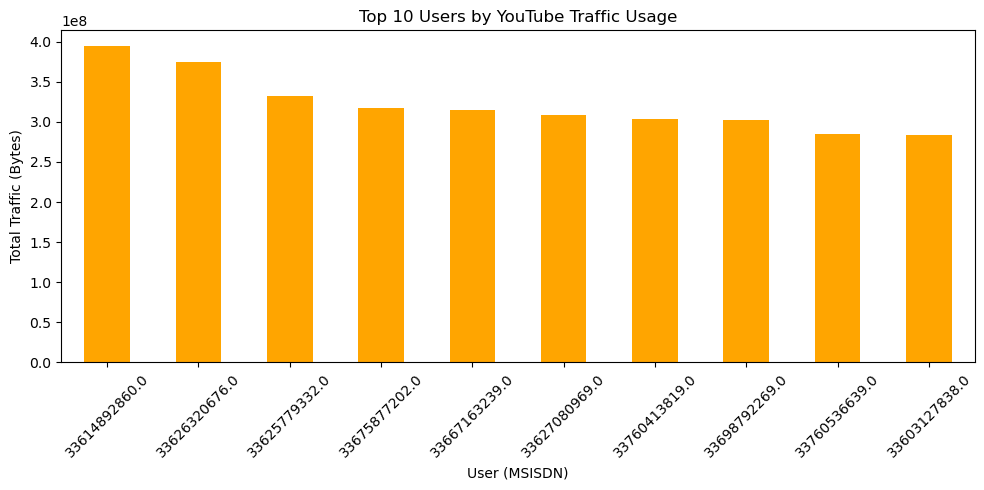

In [417]:
# Example: Plot top 10 YouTube users
top_youtube = top_users_per_app['YouTube']

top_youtube.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Top 10 Users by YouTube Traffic Usage')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('User (MSISDN)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot Top 3 Most Used Applications

In [419]:
# total bytes (UL + DL) across all users for each app
total_app_traffic = {
    'Social Media': df['Social Media DL (Bytes)'].sum() + df['Social Media UL (Bytes)'].sum(),
    'Gaming': df['Gaming DL (Bytes)'].sum() + df['Gaming UL (Bytes)'].sum(),
    'YouTube': df['Youtube DL (Bytes)'].sum() + df['Youtube UL (Bytes)'].sum(),
    'Netflix': df['Netflix DL (Bytes)'].sum() + df['Netflix UL (Bytes)'].sum(),
    'Google': df['Google DL (Bytes)'].sum() + df['Google UL (Bytes)'].sum(),
    'Email': df['Email DL (Bytes)'].sum() + df['Email UL (Bytes)'].sum(),
    'Other': df['Other DL (Bytes)'].sum() + df['Other UL (Bytes)'].sum()
}

# Convert to DataFrame for easier sorting and plotting
total_app_df = pd.DataFrame.from_dict(total_app_traffic, orient='index', columns=['Total Bytes'])
total_app_df = total_app_df.sort_values(by='Total Bytes', ascending=False)


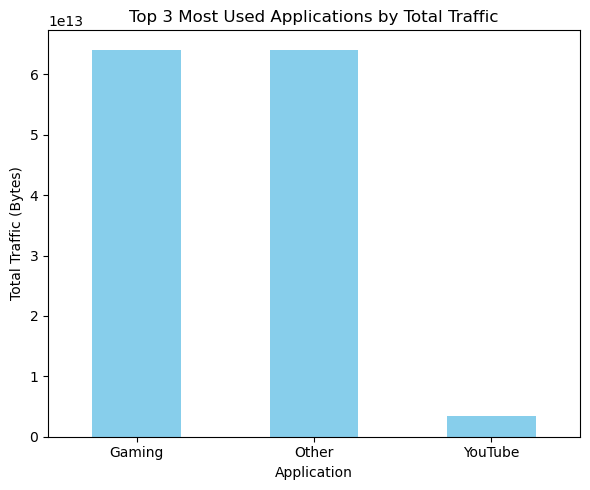

In [421]:
import matplotlib.pyplot as plt

# Get top 3
top3_apps = total_app_df.head(3)

# Plot
top3_apps.plot(kind='bar', legend=False, color='skyblue', figsize=(6, 5))
plt.title('Top 3 Most Used Applications by Total Traffic')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('Application')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# K-Means Clustering for User Engagement

In [423]:
engagement_df = df.groupby('MSISDN/Number').agg({
    'total_data_mb': 'sum',
    'session_min': 'mean',
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()


# Normalize the Features

In [425]:
from sklearn.preprocessing import StandardScaler

features = ['total_data_mb', 'session_min', 'Total UL (Bytes)', 'Total DL (Bytes)']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(engagement_df[features])


# Elbow Method to Find Optimal k

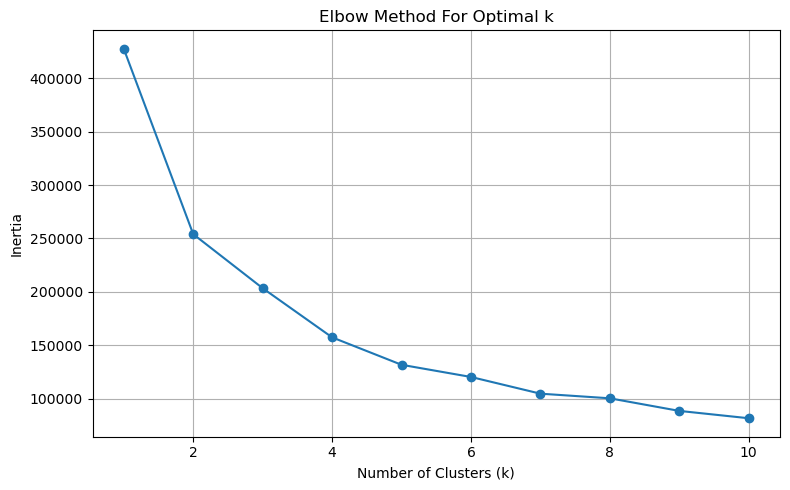

In [427]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()


# Apply K-Means with Optimized k

In [429]:
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_df['Engagement Cluster'] = kmeans.fit_predict(scaled_features)


In [431]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
engagement_df['Engagement Cluster'] = kmeans.fit_predict(engagement_scaled)


In [433]:
print(engagement_df['Engagement Cluster'].value_counts())


Engagement Cluster
2    64167
0    24991
1    17691
Name: count, dtype: int64


# Visualize Clusters (PCA 2D Plot)

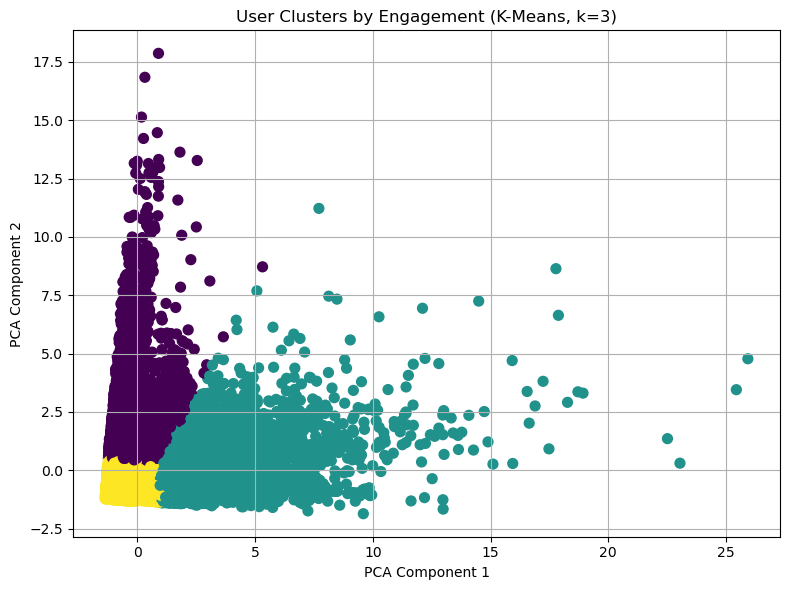

In [435]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(engagement_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1],
            c=engagement_df['Engagement Cluster'], cmap='viridis', s=50)
plt.title("User Clusters by Engagement (K-Means, k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


# Experience Analysis

In [437]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


# Aggregate TCP Retransmission Metrics(DL +UL)

# Filling the Missing Value

In [439]:
# Fill with 0 or mean, as appropriate
df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(0)
df['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)'].fillna(0)
df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean())
df['Avg Bearer TP DL (kbps)'] = df['Avg Bearer TP DL (kbps)'].fillna(df['Avg Bearer TP DL (kbps)'].mean())
df['Avg Bearer TP UL (kbps)'] = df['Avg Bearer TP UL (kbps)'].fillna(df['Avg Bearer TP UL (kbps)'].mean())
df['Handset Type'] = df['Handset Type'].fillna(df['Handset Type'].mode()[0])


# Create Combined Metrics

In [441]:
# Total TCP Retransmission Volume
df['Total TCP Retrans. (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']

# Average RTT and Throughput
df['Avg RTT (ms)'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 2
df['Avg Throughput (kbps)'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2


# Aggregate Per Customer (MSISDN)

In [443]:
agg_metrics = df.groupby('MSISDN/Number').agg({
    'Total TCP Retrans. (Bytes)': 'mean',
    'Avg RTT (ms)': 'mean',
    'Avg Throughput (kbps)': 'mean',
    'Handset Type': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
}).reset_index()

agg_metrics.columns = ['MSISDN', 'Avg TCP Retrans (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)', 'Handset Type']


#  Final Output

In [444]:
print(agg_metrics.head(10))


            MSISDN  Avg TCP Retrans (Bytes)  Avg RTT (ms)  \
0  3197020876596.0                589679.50         25.00   
1    33601001722.0                589679.50         23.00   
2    33601001754.0                589679.50         15.50   
3    33601002511.0                589679.50         25.00   
4    33601007832.0                 22015.50         42.00   
5    33601008617.0               4980255.75         29.75   
6    33601010682.0                306694.50         18.50   
7    33601011634.0                349955.75         13.25   
8    33601011959.0                 21227.50         26.00   
9    33601014694.0                589679.50         25.00   

   Avg Throughput (kbps)                                      Handset Type  
0                   0.50                  Quectel Wireless. Quectel Ec25-E  
1                  38.00                    Huawei P20 Lite Huawei Nova 3E  
2                  49.50                            Apple iPhone 7 (A1778)  
3                  4

#  Average RTT ● Handset type 

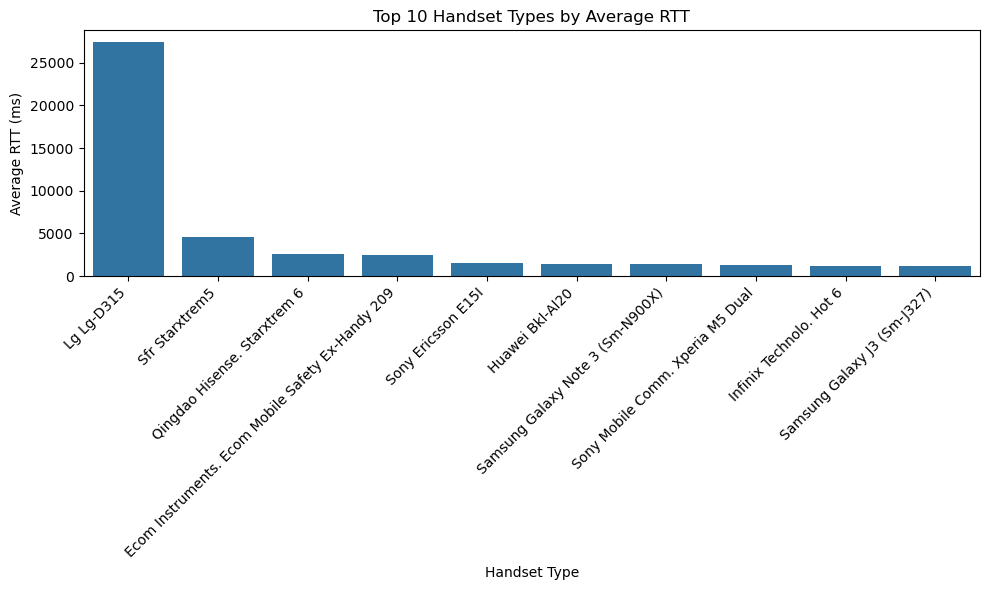

In [458]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Handle missing values
df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean())
df['Handset Type'] = df['Handset Type'].fillna(df['Handset Type'].mode()[0])

# Calculate average RTT
df['Avg RTT (ms)'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 2

# Aggregate per Handset Type
agg_rtt = df.groupby('Handset Type')['Avg RTT (ms)'].mean().reset_index()

# Select Top 10 Handsets by RTT
top_rtt = agg_rtt.sort_values(by='Avg RTT (ms)', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Handset Type', y='Avg RTT (ms)', data=top_rtt)
plt.title('Top 10 Handset Types by Average RTT')
plt.xlabel('Handset Type')
plt.ylabel('Average RTT (ms)')
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.tight_layout()
plt.show()


# Average Throughput per Handset Type:

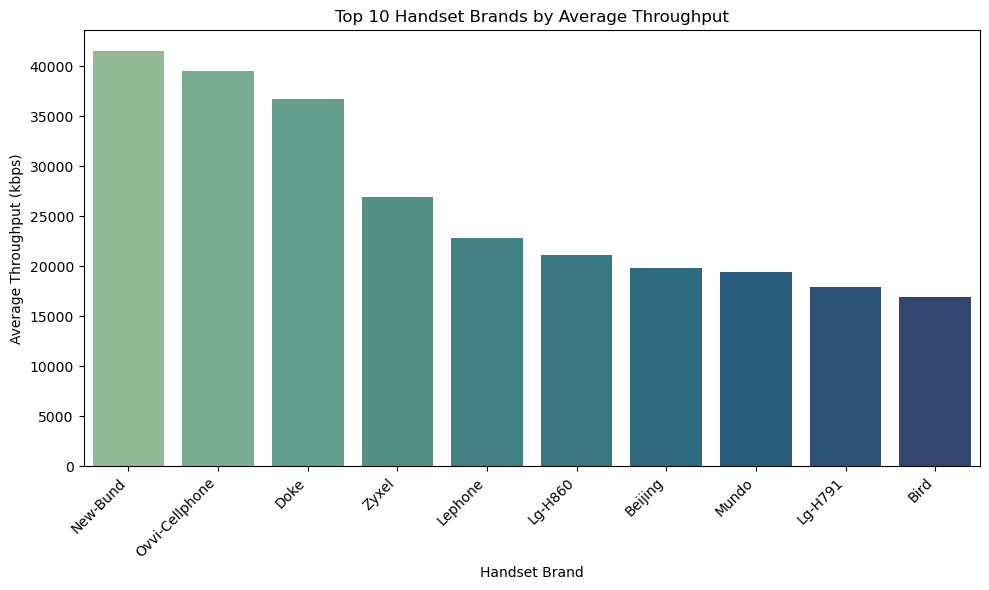

In [464]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Handle missing values
df['Avg Throughput (kbps)'] = df['Avg Throughput (kbps)'].fillna(df['Avg Throughput (kbps)'].mean())
df['handset_brand'] = df['handset_brand'].fillna(df['handset_brand'].mode()[0])

# Aggregate: average throughput per handset brand
agg_throughput = df.groupby('handset_brand')['Avg Throughput (kbps)'].mean().reset_index()

# Sort and take top 10 handset brands
top_throughput = agg_throughput.sort_values(by='Avg Throughput (kbps)', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='handset_brand', y='Avg Throughput (kbps)', data=top_throughput, palette='crest')
plt.title('Top 10 Handset Brands by Average Throughput')
plt.xlabel('Handset Brand')
plt.ylabel('Average Throughput (kbps)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Compute & list 10 of the top, bottom, and most frequent

a. TCP values in the dataset.
b. RTT values in the dataset.
c. Throughput values in the dataset. 

In [466]:
import pandas as pd

# Assuming 'df' is your original DataFrame

# TCP: Extracting DL and UL retransmission volume
tcp_dl_values = df['TCP DL Retrans. Vol (Bytes)']
tcp_ul_values = df['TCP UL Retrans. Vol (Bytes)']

# RTT: Extracting DL and UL RTT values
rtt_dl_values = df['Avg RTT DL (ms)']
rtt_ul_values = df['Avg RTT UL (ms)']

# Throughput: Extracting DL and UL throughput values
throughput_dl_values = df['Avg Bearer TP DL (kbps)']
throughput_ul_values = df['Avg Bearer TP UL (kbps)']

# List top 10, bottom 10, and most frequent values for TCP
top_tcp = pd.concat([tcp_dl_values, tcp_ul_values]).nlargest(10)
bottom_tcp = pd.concat([tcp_dl_values, tcp_ul_values]).nsmallest(10)
most_frequent_tcp = pd.concat([tcp_dl_values, tcp_ul_values]).mode().head(10)

# List top 10, bottom 10, and most frequent values for RTT
top_rtt = pd.concat([rtt_dl_values, rtt_ul_values]).nlargest(10)
bottom_rtt = pd.concat([rtt_dl_values, rtt_ul_values]).nsmallest(10)
most_frequent_rtt = pd.concat([rtt_dl_values, rtt_ul_values]).mode().head(10)

# List top 10, bottom 10, and most frequent values for Throughput
top_throughput = pd.concat([throughput_dl_values, throughput_ul_values]).nlargest(10)
bottom_throughput = pd.concat([throughput_dl_values, throughput_ul_values]).nsmallest(10)
most_frequent_throughput = pd.concat([throughput_dl_values, throughput_ul_values]).mode().head(10)

# Printing the results
print("Top 10 TCP values:")
print(top_tcp)

print("\nBottom 10 TCP values:")
print(bottom_tcp)

print("\nMost Frequent TCP values:")
print(most_frequent_tcp)

print("\nTop 10 RTT values:")
print(top_rtt)

print("\nBottom 10 RTT values:")
print(bottom_rtt)

print("\nMost Frequent RTT values:")
print(most_frequent_rtt)

print("\nTop 10 Throughput values:")
print(top_throughput)

print("\nBottom 10 Throughput values:")
print(bottom_throughput)

print("\nMost Frequent Throughput values:")
print(most_frequent_throughput)


Top 10 TCP values:
77950     4.294426e+09
135677    4.291380e+09
34636     4.289877e+09
140797    4.289488e+09
3741      4.288060e+09
119667    4.275259e+09
39608     4.268432e+09
76971     4.259997e+09
59011     4.256650e+09
41182     4.254644e+09
dtype: float64

Bottom 10 TCP values:
13260     1.0
15237     1.0
36067     1.0
38380     1.0
75076     1.0
78672     1.0
90210     1.0
124047    1.0
138813    1.0
138997    1.0
dtype: float64

Most Frequent TCP values:
0    20949.5
dtype: float64

Top 10 RTT values:
30155     96923.0
29916     64640.0
5963      54847.0
22839     26971.0
23442     26250.0
1361      25873.0
81256     25602.0
97312     25374.0
100575    24733.0
97905     20979.0
dtype: float64

Bottom 10 RTT values:
42602     0.0
52217     0.0
60143     0.0
61144     0.0
61337     0.0
103321    0.0
124538    0.0
142526    0.0
143878    0.0
54        0.0
dtype: float64

Most Frequent RTT values:
0    5.0
dtype: float64

Top 10 Throughput values:
120876    378160.0
141250    299

# Compute & report

# Distribution of Average Throughput per Handset Type

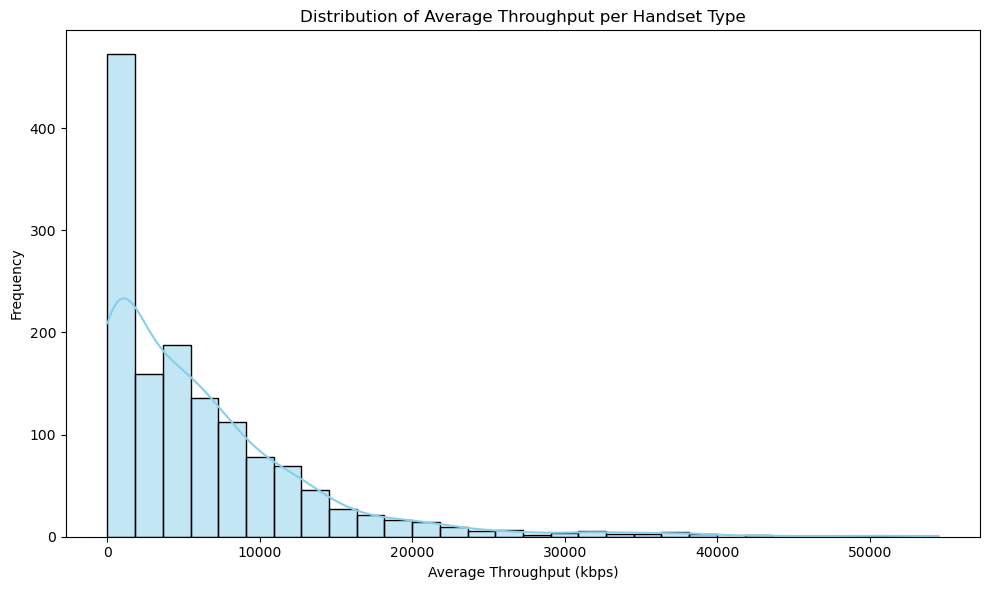

Right-skewed: Most handsets fall in the lower throughput range, while a few models have very high throughput.
Outliers: A small number of high-end devices might cause long tails.
Performance gap: There’s a significant performance difference between handset types in network quality.


In [468]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average throughput
df['Avg Bearer TP DL (kbps)'] = df['Avg Bearer TP DL (kbps)'].fillna(df['Avg Bearer TP DL (kbps)'].mean())
df['Avg Bearer TP UL (kbps)'] = df['Avg Bearer TP UL (kbps)'].fillna(df['Avg Bearer TP UL (kbps)'].mean())
df['Avg Throughput (kbps)'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2

# Aggregate average throughput per handset type
throughput_dist = df.groupby('Handset Type')['Avg Throughput (kbps)'].mean().reset_index()

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(throughput_dist['Avg Throughput (kbps)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Throughput per Handset Type')
plt.xlabel('Average Throughput (kbps)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("Right-skewed: Most handsets fall in the lower throughput range, while a few models have very high throughput.")

print("Outliers: A small number of high-end devices might cause long tails.")

print("Performance gap: There’s a significant performance difference between handset types in network quality.")


#  Average TCP Retransmission per Handset Type

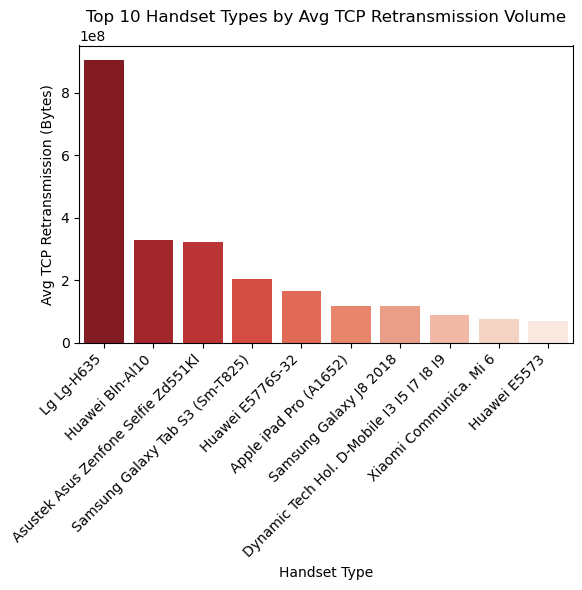

High retransmission may indicate.Poor network quality for those handsets.Older or budget phones with weaker antennas or chipsets.
Lower retransmissions often occur on newer or high-end models.
A high TCP retransmission rate can affect app responsiveness and user experience.


In [470]:
# Handle missing values
df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean())
df['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)'].fillna(df['TCP UL Retrans. Vol (Bytes)'].mean())

# Calculate total TCP retransmission
df['TCP Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']

# Aggregate average retransmission per handset
tcp_agg = df.groupby('Handset Type')['TCP Retrans. Vol (Bytes)'].mean().reset_index()

# Plot top 10 handset types by average retransmission
top_tcp = tcp_agg.sort_values(by='TCP Retrans. Vol (Bytes)', ascending=False).head(10)

plt.figure(figsize=(6, 6))
sns.barplot(x='Handset Type', y='TCP Retrans. Vol (Bytes)', data=top_tcp, palette='Reds_r')
plt.title('Top 10 Handset Types by Avg TCP Retransmission Volume')
plt.xlabel('Handset Type')
plt.ylabel('Avg TCP Retransmission (Bytes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("High retransmission may indicate."

"Poor network quality for those handsets."

"Older or budget phones with weaker antennas or chipsets.")

print("Lower retransmissions often occur on newer or high-end models.")

print("A high TCP retransmission rate can affect app responsiveness and user experience.")




# User Segmentation using K-Means

Prepare the data

In [472]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Prepare the experience metrics per user (assuming 'MSISDN/Number' is the user ID)
experience_metrics = df.copy()

# Fill missing values
experience_metrics['Avg RTT DL (ms)'] = experience_metrics['Avg RTT DL (ms)'].fillna(experience_metrics['Avg RTT DL (ms)'].mean())
experience_metrics['Avg RTT UL (ms)'] = experience_metrics['Avg RTT UL (ms)'].fillna(experience_metrics['Avg RTT UL (ms)'].mean())
experience_metrics['Avg Bearer TP DL (kbps)'] = experience_metrics['Avg Bearer TP DL (kbps)'].fillna(experience_metrics['Avg Bearer TP DL (kbps)'].mean())
experience_metrics['Avg Bearer TP UL (kbps)'] = experience_metrics['Avg Bearer TP UL (kbps)'].fillna(experience_metrics['Avg Bearer TP UL (kbps)'].mean())
experience_metrics['TCP DL Retrans. Vol (Bytes)'] = experience_metrics['TCP DL Retrans. Vol (Bytes)'].fillna(experience_metrics['TCP DL Retrans. Vol (Bytes)'].mean())
experience_metrics['TCP UL Retrans. Vol (Bytes)'] = experience_metrics['TCP UL Retrans. Vol (Bytes)'].fillna(experience_metrics['TCP UL Retrans. Vol (Bytes)'].mean())

# Feature engineering
experience_metrics['Avg RTT (ms)'] = (experience_metrics['Avg RTT DL (ms)'] + experience_metrics['Avg RTT UL (ms)']) / 2
experience_metrics['Avg Throughput (kbps)'] = (experience_metrics['Avg Bearer TP DL (kbps)'] + experience_metrics['Avg Bearer TP UL (kbps)']) / 2
experience_metrics['TCP Retransmission (Bytes)'] = experience_metrics['TCP DL Retrans. Vol (Bytes)'] + experience_metrics['TCP UL Retrans. Vol (Bytes)']

# Aggregate per user
user_exp = experience_metrics.groupby('MSISDN/Number')[['Avg RTT (ms)', 'Avg Throughput (kbps)', 'TCP Retransmission (Bytes)']].mean().reset_index()


Normalize and Run K-Means

In [474]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(user_exp[['Avg RTT (ms)', 'Avg Throughput (kbps)', 'TCP Retransmission (Bytes)']])

# Run K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
user_exp['Experience Cluster'] = kmeans.fit_predict(X_scaled)


Analyze and Describe the Clusters

In [476]:
# Get cluster centers in original scale
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                         columns=['Avg RTT (ms)', 'Avg Throughput (kbps)', 'TCP Retransmission (Bytes)'])

# Print description
print("Cluster Centers:")
print(centroids)


Cluster Centers:
   Avg RTT (ms)  Avg Throughput (kbps)  TCP Retransmission (Bytes)
0     61.509961            2139.582708                1.567223e+06
1     51.043544           27429.073066                1.860338e+07
2     72.256869           35976.375909                2.205250e+09


Cluster	RTT (ms)	Throughput (kbps)	TCP Retrans.	Description
0	    High	       Low	               High	         Poor Experience Users: Slow, high retransmission
1	    Medium	      Medium	          Medium	     Moderate Experience Users: Average performance
2	    Low	           High	                Low	         High Experience Users: Fast, smooth network

In [494]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Run KMeans on scaled engagement features to find 2 clusters
kmeans_eng = KMeans(n_clusters=2, random_state=42)
kmeans_eng.fit(df_engagement_scaled)

# Get cluster centers (these are in scaled form)
engagement_centroids = kmeans_eng.cluster_centers_

# Determine which cluster is "less engaged" by summing feature values
# Less engaged → lower total across features
least_engaged_idx = np.argmin(np.sum(engagement_centroids, axis=1))

# Select the corresponding centroid
engagement_centroid = engagement_centroids[least_engaged_idx]

# Define the engagement and experience features
engagement_features = ['session_min', 'total_data_mb', 'Total UL (Bytes)', 'Total DL (Bytes)']
experience_features = ['Avg RTT (ms)', 'Total TCP Retrans. (Bytes)', 'Avg Throughput (kbps)']

# Combine engagement and experience features for scaling
combined_features = engagement_features + experience_features

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the combined features (engagement + experience)
df_combined = df[combined_features]
scaler.fit(df_combined)  # Fit on the combined features

# Now, transform both engagement and experience data using the same fitted scaler
df_combined_scaled = scaler.transform(df_combined)  # Transform both combined features

# Split the scaled data back into engagement and experience components
df_engagement_scaled = df_combined_scaled[:, :len(engagement_features)]
df_experience_scaled = df_combined_scaled[:, len(engagement_features):]

experience_centroids = np.array([
    [61.509961, 2139.582708, 1.567223e+06],  # Cluster 0
    [51.043544, 27429.073066, 1.860338e+07], # Cluster 1
    [72.256869, 35976.375909, 2.205250e+09]  # Cluster 2
])

# Define the closest centroid to the user for Experience Score calculation
# Assuming we're using Cluster 0 for "worst" experience as an example
worst_experience_centroid = experience_centroids[0]  # You can change this as per your need

# Function to calculate Euclidean distance
def calculate_engagement_score(user_data, centroid):
    return np.linalg.norm(user_data - centroid)

def calculate_experience_score(user_data, centroid):
    return np.linalg.norm(user_data - centroid)

# Calculate Engagement and Experience Scores for each user
df['Engagement_Score'] = [calculate_engagement_score(user, engagement_centroid) for user in df_engagement_scaled]
df['Experience_Score'] = [calculate_experience_score(user, worst_experience_centroid) for user in df_experience_scaled]

# View results
print(df[['MSISDN/Number', 'Engagement_Score', 'Experience_Score']].head())


    MSISDN/Number  Engagement_Score  Experience_Score
6   33665368271.0         11.870931      1.567225e+06
7   33763490140.0         11.311284      1.567225e+06
8   33698743617.0         11.219251      1.567225e+06
9   33659219748.0         10.384477      1.567225e+06
10  33665646348.0          9.773882      1.567225e+06


# Visualization

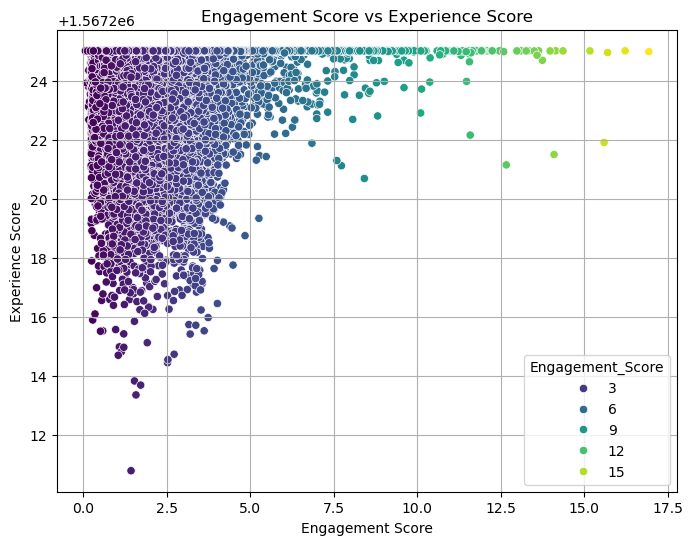

In [496]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Engagement vs Experience Scores
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Engagement_Score', y='Experience_Score', hue='Engagement_Score', palette='viridis')
plt.title("Engagement Score vs Experience Score")
plt.xlabel("Engagement Score")
plt.ylabel("Experience Score")
plt.grid(True)
plt.show()


# Average of both engagement & experience scores 

In [502]:
# Calculate the Satisfaction Score
df['Satisfaction_Score'] = (df['Engagement_Score'] + df['Experience_Score']) / 2

# Sort the DataFrame by Satisfaction Score in descending order and select the top 10
top_10_satisfied_customers = df[['MSISDN/Number', 'Satisfaction_Score']].sort_values(by='Satisfaction_Score', ascending=False).head(10)

# Display the top 10 satisfied customers
print(top_10_satisfied_customers)


        MSISDN/Number  Satisfaction_Score
125005  33625779332.0       783620.965487
125006  33762601828.0       783620.624342
125007  33625779332.0       783620.334024
125008  33666816945.0       783620.095937
125010  33664693736.0       783619.692622
125009  33670672490.0       783619.583652
75001   33667456716.0       783619.514473
125011  33664110164.0       783619.498712
100004  33630495793.0       783619.328585
125013  33664693736.0       783619.259903


#  Build a regression model
MAE ≈ 0.23 → On average, predictions are off by ~0.23 units (which is tiny if your satisfaction scores are in the 783,000+ range).

MSE ≈ 0.0906 → Squared error is small, reinforcing that predictions are close to actuals.

R² ≈ 0.83 → The model still explains 83% of the variance in satisfaction scores, which is very good for real-world data.



In [511]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Prepare the data
# Select features that might influence the satisfaction score
features = ['session_min', 'total_data_mb', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Avg RTT (ms)', 'Total TCP Retrans. (Bytes)', 'Avg Throughput (kbps)']
X = df[features]
y = df['Satisfaction_Score']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better performance of the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Display the predicted vs actual satisfaction scores for the test set
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())


Mean Absolute Error (MAE): 0.2324194813272691
Mean Squared Error (MSE): 0.0905648250697584
R-squared (R²): 0.83309156836216
               Actual      Predicted
70156   783613.298585  783613.567265
37213   783613.420084  783613.477821
76108   783614.189572  783614.042074
139978  783613.455181  783613.287657
38235   783613.063434  783613.201596


# Run a k-means (k=2) on the engagement & the experience score.

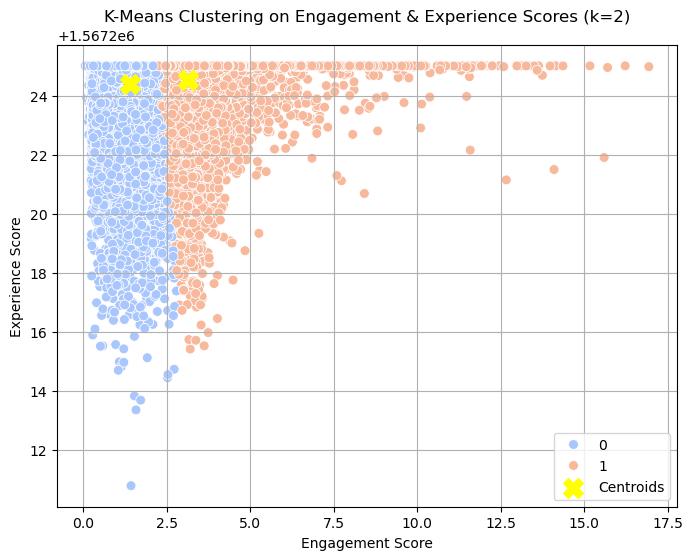

Cluster Centers:
[[1.40482244e+00 1.56722441e+06]
 [3.14775086e+00 1.56722454e+06]]
Cluster 0: More users, possibly with better scores
Cluster 1: Fewer users, possibly with higher scores 


In [513]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the columns for clustering
clustering_features = df[['Engagement_Score', 'Experience_Score']]

# Run K-Means with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster_Label'] = kmeans.fit_predict(clustering_features)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Engagement_Score',
    y='Experience_Score',
    hue='Cluster_Label',
    palette='coolwarm',
    s=50
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c='yellow', label='Centroids', marker='X'
)
plt.title("K-Means Clustering on Engagement & Experience Scores (k=2)")
plt.xlabel("Engagement Score")
plt.ylabel("Experience Score")
plt.legend()
plt.grid(True)
plt.show()

# View centroids and a sample of clustered data
print("Cluster Centers:")
print(kmeans.cluster_centers_)

df[['MSISDN/Number', 'Engagement_Score', 'Experience_Score', 'Cluster_Label']].head()

print("Cluster 0: More users, possibly with better scores")
print("Cluster 1: Fewer users, possibly with higher scores ")


In [515]:
# First, calculate satisfaction score if not already in the DataFrame
df['Satisfaction_Score'] = (df['Engagement_Score'] + df['Experience_Score']) / 2

# Now, group by the cluster and aggregate
cluster_summary = df.groupby('Cluster_Label')[['Satisfaction_Score', 'Experience_Score']].mean().reset_index()

# Display the result
print(cluster_summary)


   Cluster_Label  Satisfaction_Score  Experience_Score
0              0       783612.904167      1.567224e+06
1              1       783613.844915      1.567225e+06


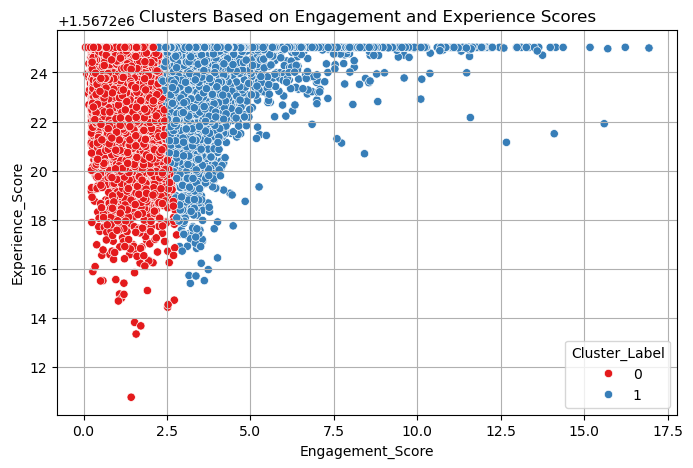

In [517]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Engagement_Score', y='Experience_Score', hue='Cluster_Label', palette='Set1')
plt.title("Clusters Based on Engagement and Experience Scores")
plt.grid(True)
plt.show()


In [519]:
df_final = df[['MSISDN/Number', 'Engagement_Score', 'Experience_Score', 'Satisfaction_Score', 'Cluster_Label']]


In [527]:
from sqlalchemy import create_engine

# Define SQL Server connection details
server = 'DESKTOP-9K6EOTQ\SQLEXPRESS'  # The name of your server
database = 'master'  # The database you want to connect to

# Create a connection string with a trusted connection
connection_url = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"

# Create an engine
engine = create_engine(connection_url)

# Transfer data to SQL Server
table_name = 'iris_dataset'
df_final.to_sql(table_name, engine, if_exists='replace', index=False)

# Confirm completion
print(f"Dataset transferred to SQL Server table: {table_name}")

# Dispose the engine
engine.dispose()

Dataset transferred to SQL Server table: iris_dataset
